In [34]:
# Import Libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#Loading data
url = "https://raw.githubusercontent.com/ingledarshan/DL_dataset/master/moore.csv"
data = pd.read_csv(url,header=None).values

In [36]:
#Assigning independent and dependent variables
x = data[:,0].reshape(-1,1)
y = data[:,1]

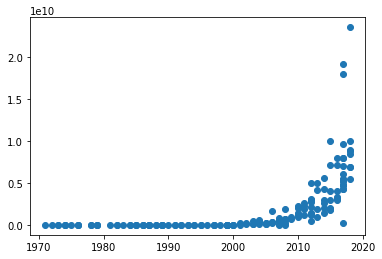

In [37]:
# Data is in exponential in nature
plt.scatter(x,y)

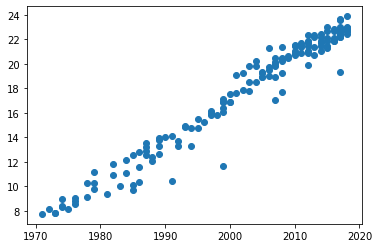

In [38]:
#Forcely converting into linear for better analysis in Linear Regression
y = np.log(y)
plt.scatter(x,y)

In [46]:
#Scaling the x values
X = x - x.mean()

In [47]:
# Building model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))

In [48]:
#Lets call model.compile
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')

In [49]:
#Learning Rate Scheduler

def schedule(epoch,lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
# Train the model
r = model.fit(X,y,epochs=200,callbacks=[scheduler])

Text(0, 0.5, 'Loss')

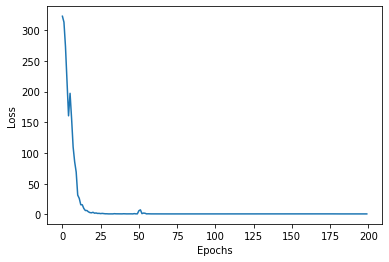

In [67]:
#Plot the loss
plt.plot(r.history['loss'],label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [52]:
# Now lets gets the trained weights of the model

weight = model.layers[0].get_weights()[0][0,0]
weight

0.33776695

In [60]:
print("Time to Double :",int(np.round((np.log(2)/weight))))

Time to Double : 2


In [65]:
# Make  Predictions

Yhat = model.predict(X).flatten()

(162,)

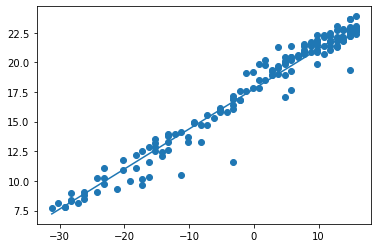

In [66]:
# Checking the LOBF
plt.scatter(X,y)
plt.plot(X,Yhat)